In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib.animation import FuncAnimation, PillowWriter  

In [1]:
def read_uncert(path):
    epochs = []
    val_idx = []
    reward = []
    epist = []
    aleat = []
    mean_epist = []
    mean_aleat = []
    with open(path, 'r') as f:
        for row in f:
            data = np.array(row[:-1].split(',')).astype(np.float32)
            epochs.append(data[0])
            val_idx.append(data[1])
            reward.append(data[2])
            l = len(data) - 3
            epist.append(data[3: l//2 + 3])
            aleat.append(data[l//2 + 3:])
    #epochs, reward, val_idx, (unique_ep, mean_epist, mean_aleat), (epist, aleat) = mean_(epochs, reward, epist, aleat)
    return mean_(np.array(epochs), np.array(reward), epist, aleat)

def read_uncert_test(path):
    epochs = []
    val_idx = []
    reward = []
    sigma = []
    epist = []
    aleat = []
    mean_epist = []
    mean_aleat = []
    with open(path, 'r') as f:
        for row in f:
            data = np.array(row[:-1].split(',')).astype(np.float32)
            epochs.append(data[0])
            val_idx.append(data[1])
            reward.append(data[2])
            sigma.append(data[3])
            l = len(data) - 4
            epist.append(data[4: l//2 + 4])
            aleat.append(data[l//2 + 4:])
    #epochs, reward, val_idx, (unique_ep, mean_epist, mean_aleat), (epist, aleat) = mean_(epochs, reward, epist, aleat)
    return mean_(np.array(epochs), np.array(reward), epist, aleat), np.unique(sigma)

def mean_(epochs, reward, epist, aleat):
    unique_ep = np.unique(epochs)
    mean_reward = np.zeros(unique_ep.shape, dtype=np.float32)
    mean_epist = np.zeros(unique_ep.shape, dtype=np.float32)
    mean_aleat = np.zeros(unique_ep.shape, dtype=np.float32)
    for idx, ep in enumerate(unique_ep):
        indexes = np.argwhere(ep == epochs).astype(np.int)
        mean_reward[idx] = np.mean(reward[indexes])
        for i in range(indexes.shape[0]):
            mean_epist[idx] += np.mean(epist[indexes[i][0]]) / indexes.shape[0]
            mean_aleat[idx] += np.mean(aleat[indexes[i][0]]) / indexes.shape[0]
    return epochs, (unique_ep, mean_reward, mean_epist, mean_aleat), (epist, aleat)

In [3]:
sens_path = 'uncertainties/train_sens_2.txt'
drop10_path = 'uncertainties/train_drop100.txt'
#boot10_path = 'uncertainties/train_boot10_2.txt'
boot10_path = 'uncertainties/train_boot2.txt'
bnn_path = 'uncertainties/train_bnn.txt'

uncert_path = 'uncertainties/train_base.txt'

In [4]:
_, (epochs, mean_reward, _, _), (_, _) = read_uncert(uncert_path)

epochs_sens, (unique_ep_sens, reward_sens, mean_epist_sens, mean_aleat_sens), (epist_sens, aleat_sens) = read_uncert(sens_path)
epochs_drop10, (unique_ep_drop10, reward_drop10, mean_epist_drop10, mean_aleat_drop10), (epist_drop10, aleat_drop10) = read_uncert(drop10_path)
epochs_boot10, (unique_ep_boot10, reward_boot10, mean_epist_boot10, mean_aleat_boot10), (epist_boot10, aleat_boot10) = read_uncert(boot10_path)
epochs_bnn, (unique_ep_bnn, reward_bnn, mean_epist_bnn, mean_aleat_bnn), (epist_bnn, aleat_bnn) = read_uncert(bnn_path)

In [5]:
"""fig, ax = plt.subplots()  
ln1, = plt.plot([], [])

def init():  
    ax.set_xlim(0, 125)
    ax.set_ylim(0, 3)
    ax.set_xlabel("Frame")

def update(i):
    ax.set_title("Incerteza Epistemica ep {}".format(i*10))
    ln1.set_data(range(len(epist_drop_p[i])), epist_drop_p[i])

ani = FuncAnimation(fig, update, range(len(epist_drop_p)), init_func=init) 

writer = PillowWriter(fps=10)
ani.save("demo.gif", writer=writer)
"""

'fig, ax = plt.subplots()  \nln1, = plt.plot([], [])\n\ndef init():  \n    ax.set_xlim(0, 125)\n    ax.set_ylim(0, 3)\n    ax.set_xlabel("Frame")\n\ndef update(i):\n    ax.set_title("Incerteza Epistemica ep {}".format(i*10))\n    ln1.set_data(range(len(epist_drop_p[i])), epist_drop_p[i])\n\nani = FuncAnimation(fig, update, range(len(epist_drop_p)), init_func=init) \n\nwriter = PillowWriter(fps=10)\nani.save("demo.gif", writer=writer)\n'

# Todos los modelos

<ipython-input-6-062ebfba0425>:21: RuntimeWarning: invalid value encountered in true_divide
  ax[1].plot(unique_ep_bnn, mean_aleat_bnn/np.max(mean_aleat_bnn), 'b', label='BNN')


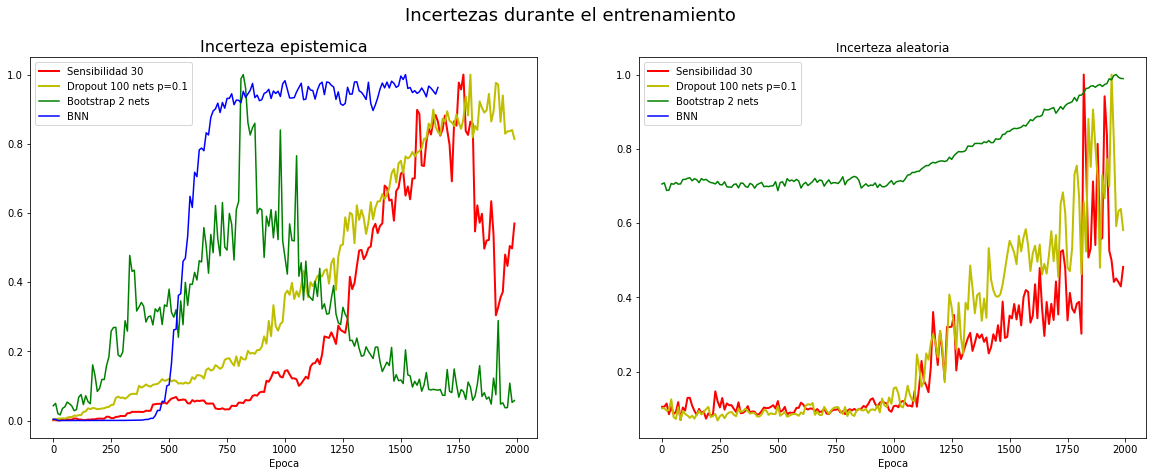

In [6]:
fig, ax = plt.subplots(nrows=1, ncols=2)
fig.set_figheight(7)
fig.set_figwidth(20)

fig.suptitle("Incertezas durante el entrenamiento", fontsize=18)

ax[0].set_title('Incerteza epistemica', fontsize=16)
ax[0].set_xlabel('Epoca')

ax[0].plot(unique_ep_sens, mean_epist_sens/np.max(mean_epist_sens), 'r', label='Sensibilidad 30', alpha=1, linewidth=2)
ax[0].plot(unique_ep_drop10, mean_epist_drop10/np.max(mean_epist_drop10), 'y', label='Dropout 100 nets p=0.1', alpha=1, linewidth=2)
ax[0].plot(unique_ep_boot10, mean_epist_boot10/np.max(mean_epist_boot10), 'g', label='Bootstrap 2 nets')
ax[0].plot(unique_ep_bnn, mean_epist_bnn/np.max(mean_epist_bnn), 'b', label='BNN')
ax[0].legend()

ax[1].set_title('Incerteza aleatoria')
ax[1].set_xlabel('Epoca')
ax[1].plot(unique_ep_sens, mean_aleat_sens/np.max(mean_aleat_sens), 'r', label='Sensibilidad 30', alpha=1, linewidth=2)
ax[1].plot(unique_ep_drop10, mean_aleat_drop10/np.max(mean_aleat_drop10), 'y', label='Dropout 100 nets p=0.1', alpha=1, linewidth=2)
ax[1].plot(unique_ep_boot10, mean_aleat_boot10/np.max(mean_aleat_boot10), 'g', label='Bootstrap 2 nets')
ax[1].plot(unique_ep_bnn, mean_aleat_bnn/np.max(mean_aleat_bnn), 'b', label='BNN')
ax[1].legend()


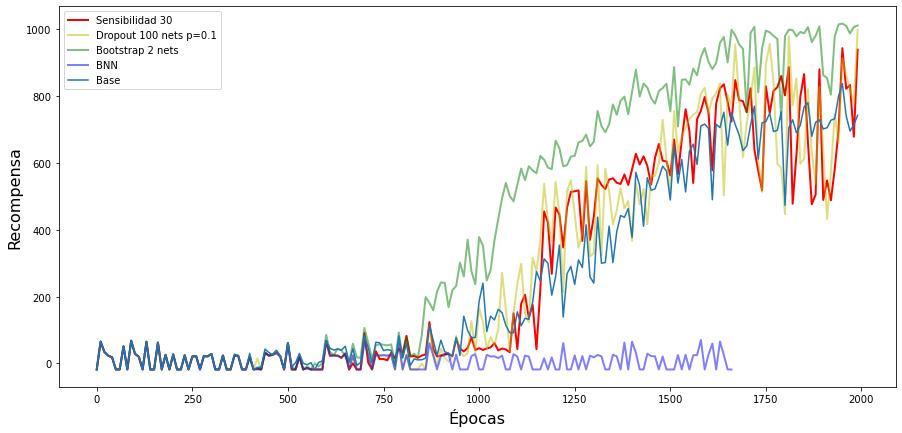

In [7]:
plt.figure(figsize=(15, 7))
plt.plot(unique_ep_sens, reward_sens, 'r', label="Sensibilidad 30", alpha=1, linewidth=2)
plt.plot(unique_ep_drop10, reward_drop10, 'y', label="Dropout 100 nets p=0.1", alpha=0.5, linewidth=2)
plt.plot(unique_ep_boot10, reward_boot10, 'g', label="Bootstrap 2 nets", alpha=0.5, linewidth=2)
plt.plot(unique_ep_bnn, reward_bnn, 'b', label="BNN", alpha=0.5, linewidth=2)
plt.plot(epochs, mean_reward, label="Base")


plt.xlabel("Épocas", fontsize=16)
plt.ylabel("Recompensa", fontsize=16)
plt.legend()

# Prueba

In [32]:
sens_test_path = 'uncertainties/test_sens_2.txt'
boot_test_path = 'uncertainties/test_boot_2.txt'
drop_test_path = 'uncertainties/test_drop.txt'

In [33]:
(epochs_sens, (unique_ep_sens, mean_reward_sens, mean_epist_sens, mean_aleat_sens), (epist_sens, aleat_sens)), sigma_sens = read_uncert_test(sens_test_path)
(epochs_boot, (unique_ep_boot, mean_reward_boot, mean_epist_boot, mean_aleat_boot), (epist_boot, aleat_boot)), sigma_boot = read_uncert_test(boot_test_path)
(epochs_drop, (unique_ep_drop, mean_reward_drop, mean_epist_drop, mean_aleat_drop), (epist_drop, aleat_drop)), sigma_drop = read_uncert_test(drop_test_path)

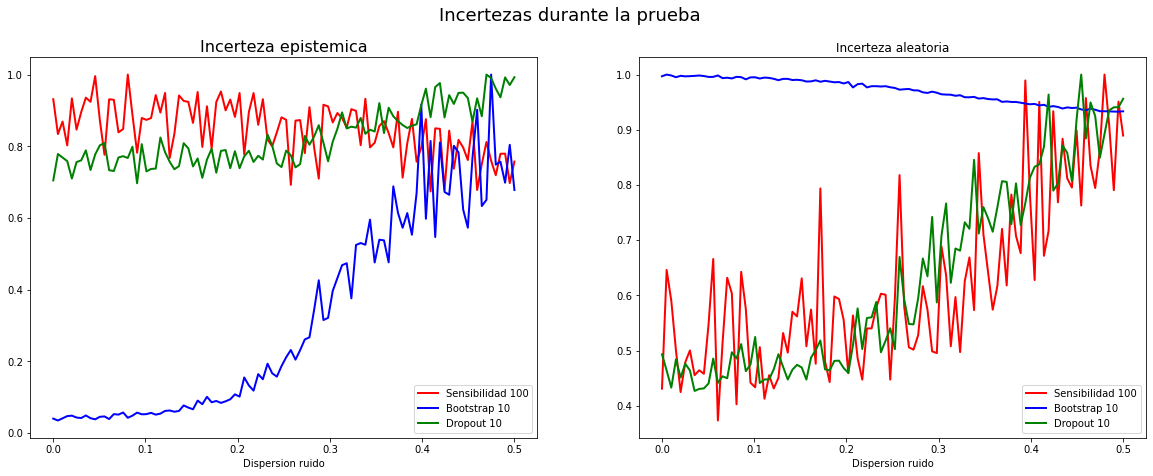

In [34]:
fig, ax = plt.subplots(nrows=1, ncols=2)
fig.set_figheight(7)
fig.set_figwidth(20)

fig.suptitle("Incertezas durante la prueba", fontsize=18)

ax[0].set_title('Incerteza epistemica', fontsize=16)
ax[0].set_xlabel('Dispersion ruido')
ax[0].plot(sigma_sens, mean_epist_sens/np.max(mean_epist_sens), 'r', label='Sensibilidad 100', alpha=1, linewidth=2)
ax[0].plot(sigma_boot, mean_epist_boot/np.max(mean_epist_boot), 'b', label='Bootstrap 10', alpha=1, linewidth=2)
ax[0].plot(sigma_drop, mean_epist_drop/np.max(mean_epist_drop), 'g', label='Dropout 10', alpha=1, linewidth=2)
ax[0].legend()

ax[1].set_title('Incerteza aleatoria')
ax[1].set_xlabel('Dispersion ruido')
ax[1].plot(sigma_sens, mean_aleat_sens/np.max(mean_aleat_sens), 'r', label='Sensibilidad 100', alpha=1, linewidth=2)
ax[1].plot(sigma_boot, mean_aleat_boot/np.max(mean_aleat_boot), 'b', label='Bootstrap 10', alpha=1, linewidth=2)
ax[1].plot(sigma_drop, mean_aleat_drop/np.max(mean_aleat_drop), 'g', label='Dropout 10', alpha=1, linewidth=2)
ax[1].legend()

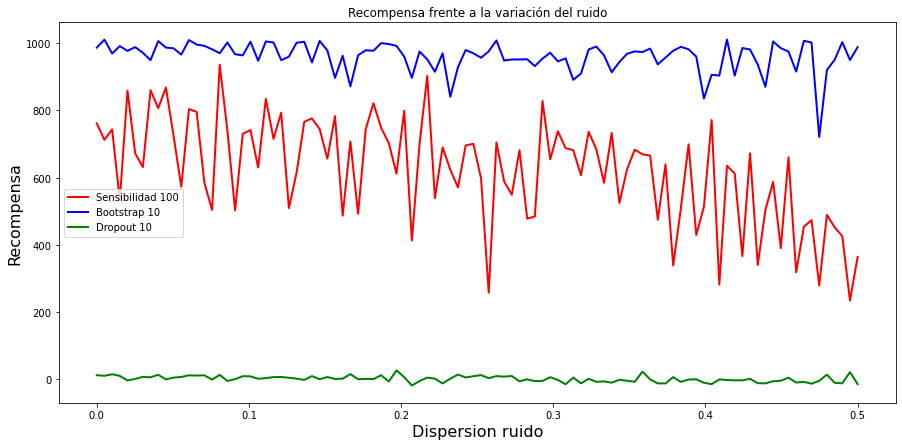

In [35]:
plt.figure(figsize=(15, 7))
#plt.plot(epochs, reward, 'b', label="Base")
plt.plot(sigma_sens, mean_reward_sens, 'r', label="Sensibilidad 100", alpha=1, linewidth=2)
plt.plot(sigma_boot, mean_reward_boot, 'b', label="Bootstrap 10", alpha=1, linewidth=2)
plt.plot(sigma_drop, mean_reward_drop, 'g', label="Dropout 10", alpha=1, linewidth=2)

plt.title('Recompensa frente a la variación del ruido')
plt.xlabel("Dispersion ruido", fontsize=16)
plt.ylabel("Recompensa", fontsize=16)
plt.legend()